# Poisonous Mushrooms
Sophia Skowronski | Fall 2020

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA</a>

Fraction of the total variance in the training data explained by the first k principal components:

k 	total variance
1 	0.164         
2 	0.2973        
3 	0.399         
4 	0.4696        
5 	0.5083        
10	0.6522        
20	0.8089        
30	0.8984        
40	0.9509        
50	0.9821        



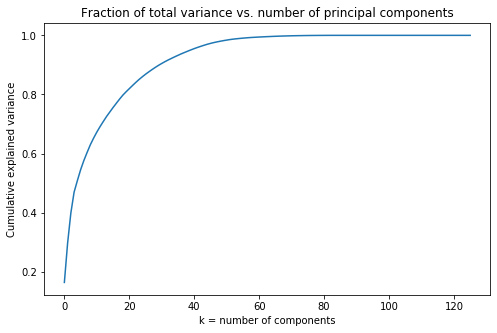

In [5]:
def P1():

    ### STUDENT START ###
    
    matrix = [['k', 'total variance']] # For display
    k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] # To loop through
    
    # For each value of k, use PCA to project the data feature sets to k principle components
    for k in k_values:
        pca = PCA(n_components=k, whiten=True)
        pca.fit(train_data)
        matrix.append([k, round(pca.explained_variance_ratio_.sum(),4)])
    
    # Print results
    print('Fraction of the total variance in the training data explained by the first k principal components:\n')
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print()

    # Plots
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Plotting lineplot of fraction of total variance vs. number of principal components
    # For all possible numbers of principal components
    ax.plot(np.cumsum(PCA().fit(train_data).explained_variance_ratio_))
    
    # Labels
    ax.set_title('Fraction of total variance vs. number of principal components')
    ax.set_xlabel('k = number of components')
    ax.set_ylabel('Cumulative explained variance')
    
    # Display
    plt.show()

    ### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA</a>

Original shape:    (7000, 126)
Transformed shape: (7000, 2)


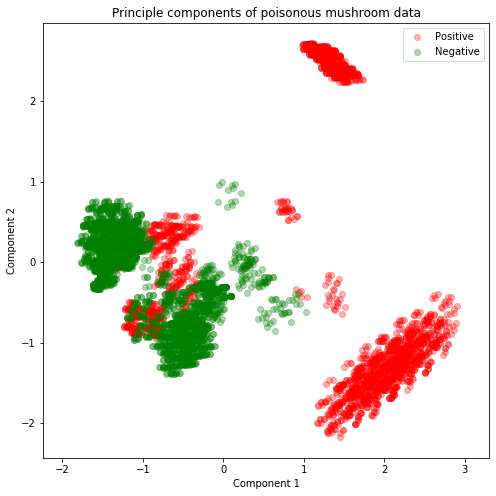

In [6]:
def P2():

    ### STUDENT START ###

    # Use PCA to project the data feature sets to 2 principle components
    pca = PCA(n_components=2)
    train_pca = pca.fit_transform(train_data)
    
    print('Original shape:   ', train_data.shape)
    print('Transformed shape:', train_pca.shape)
        
    # Get negative examples
    idx_neg = np.where(train_labels==0)
    
    # Get positive examples
    idx_pos = np.where(train_labels==1)
    
    # Plots
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

    # Scatterplots
    ax.scatter(train_pca[idx_pos,0].reshape(-1,), train_pca[idx_pos,1].reshape(-1,), c='r', marker='o', alpha=0.3, label='Positive')
    ax.scatter(train_pca[idx_neg,0].reshape(-1,), train_pca[idx_neg,1].reshape(-1,), c='g', marker='o', alpha=0.3, label='Negative')
    
    # Labels
    ax.set_title('Principle components of poisonous mushroom data')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.axis('equal')
    
    # Display
    ax.legend()
    plt.show()
    
    ### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA</a>

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>KMeans</a>

<a href='https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html'>linalg.norm</a>

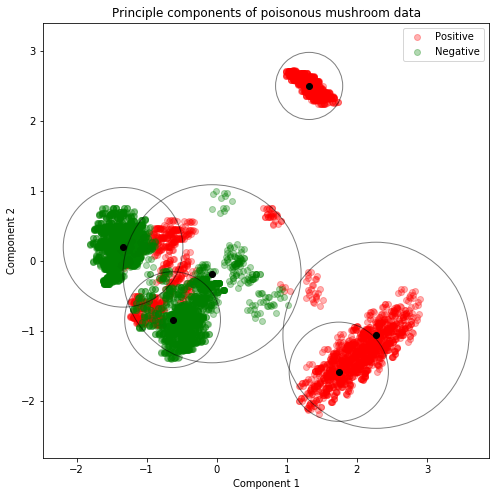

In [7]:
def P3():

    ### STUDENT START ###
    
    # Use PCA to project the data feature sets to 2 principle components
    train_pca = PCA(n_components=2).fit_transform(train_data)
    
    # Fit a k-means cluster model with 6 clusters over the 2D projected data
    kmeans = KMeans(n_clusters=6, random_state=12345)
    
    # Obtain coordinates of cluster centers
    centers = kmeans.fit(train_pca).cluster_centers_
    
    # Obtain labels for each projected data point
    cluster_labels = kmeans.fit_predict(train_pca)
    
    # For each cluster, calculate the max distance from the centroid.
    radii = []
    for label in [0,1,2,3,4,5]:
        train_pca[np.where(cluster_labels==label)]
        norm = np.linalg.norm(train_pca[np.where(cluster_labels==label)]-centers[label], axis=1)
        max_distance = norm.max()
        radii.append(max_distance)

    # Get negative examples
    idx_neg = np.where(train_labels==0)
    
    # Get positive examples
    idx_pos = np.where(train_labels==1)

    # Plots
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

    # Scatterplots
    ax.scatter(train_pca[idx_pos,0].reshape(-1,), train_pca[idx_pos,1].reshape(-1,), c='r', marker='o', alpha=0.3, label='Positive')
    ax.scatter(train_pca[idx_neg,0].reshape(-1,), train_pca[idx_neg,1].reshape(-1,), c='g', marker='o', alpha=0.3, label='Negative')
    
    # Centroids 
    for center, radius in zip(centers, radii):
        
        # Mark the centroid
        ax.plot(center[0], center[1], marker='o', c='black')
        
        # Plot a circle that goes around centroid with radius of the max distance
        ax.add_patch(plt.Circle(center, radius, color='black', fill=False, alpha=0.5, zorder=1))    

    # Labels
    ax.set_title('Principle components of poisonous mushroom data')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.axis('equal')
    
    # Display
    ax.legend()
    plt.show()
    
    ### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  
 

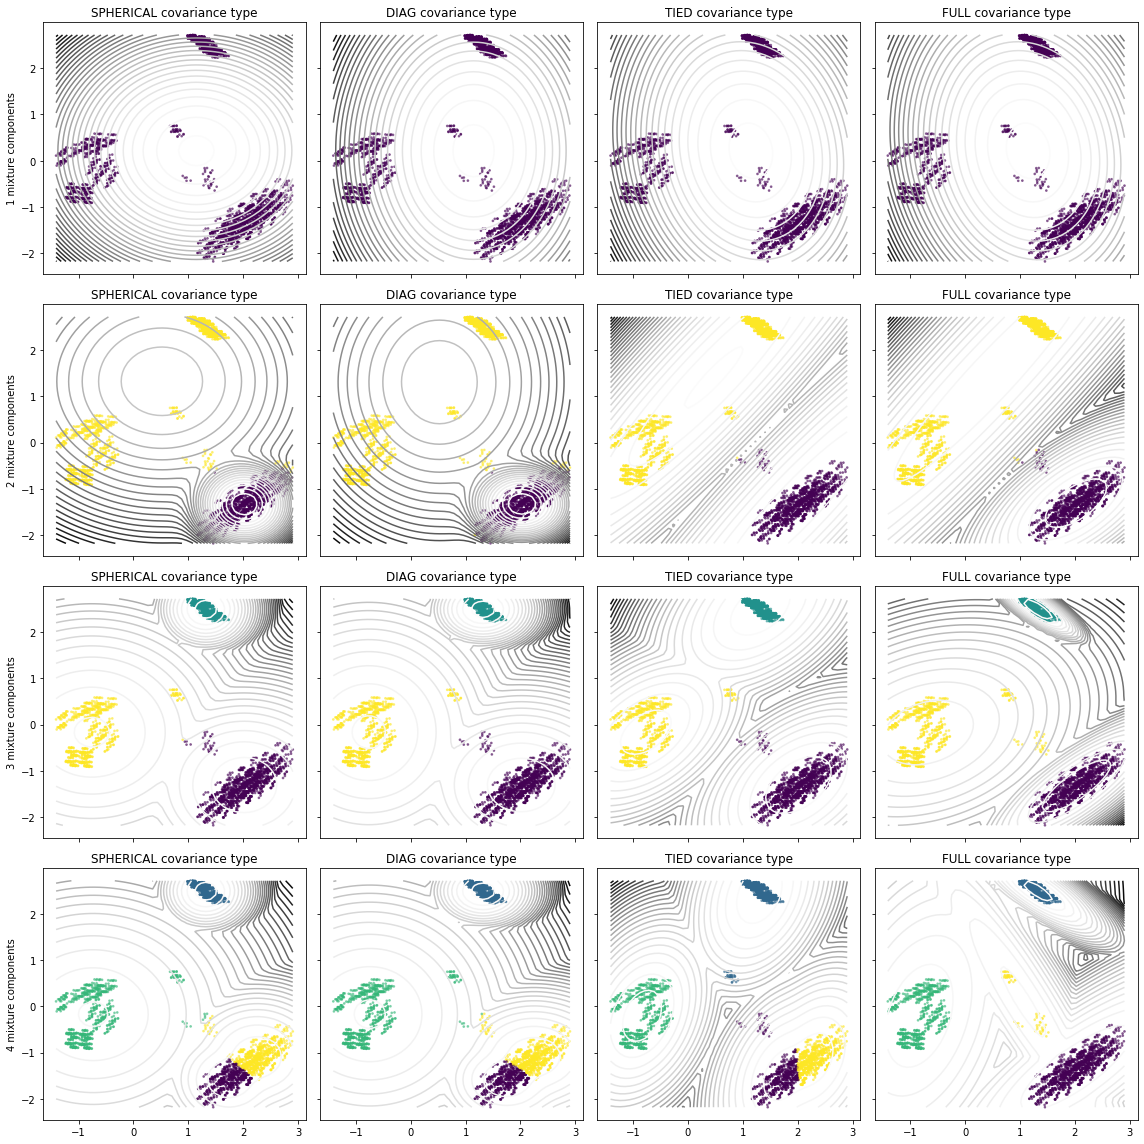

In [8]:
def P4():

    ### STUDENT START ###

    # Use PCA to project the data feature sets to 2 principle components
    train_pca = PCA(n_components=2).fit_transform(train_data)
    positives = train_pca[np.where(train_labels==1)]
    
    # 4x4 plots
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,16), sharex=True, sharey=True)
    
    # Axis limits for 4x4 plots
    x_min = positives[:,0].min()
    x_max = positives[:,0].max()
    y_min = positives[:,1].min()
    y_max = positives[:,1].max()
    
    # One row each for a number of mixture component
    for i, n_components in enumerate([1,2,3,4]):
        
        # One column each for a convariance matrix type
        for j, covariance_type in enumerate(['spherical', 'diag', 'tied', 'full']):  
            
            # Fit Gaussian mixture models for the positive (poisonous) examples in 2d projected data.
            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=12345).fit(positives)
            ax[i][j].scatter(positives[:, 0], positives[:, 1], c=gmm.predict(positives), s=3, alpha=0.5)

            # Add contour
            x, y = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
            xx = np.array([x.ravel(), y.ravel()]).T
            z = -gmm.score_samples(xx).reshape(x.shape)
            cp = ax[i][j].contour(x, y, z, levels=30, cmap='Greys')

            # Labels
            ax[i][j].set_title('{} covariance type'.format(covariance_type.upper()))
            ax[i][0].set_ylabel('{} mixture components'.format(n_components))
    
    # Display
    fig.tight_layout()
    plt.show()
    
    ### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

In [9]:
def P5():

    ### STUDENT START ###
    
    # Use PCA to project the data feature sets to 2 principle components
    pca = PCA(n_components=2)
    
    # Fit on training data
    train_pca = pca.fit_transform(train_data)
    
    # Transform the test data
    test_pca = pca.transform(test_data)
    
    print('TRAINING DATA')
    print('Original shape:   ', train_data.shape)
    print('Transformed shape:', train_pca.shape)
    print('\nTEST DATA')
    print('Original shape:   ', test_data.shape)
    print('Transformed shape:', test_pca.shape)
    
    # Fit positive and negative prediction models to training data
    gmm_pos = GaussianMixture(n_components=4, covariance_type='full', random_state=12345).fit(train_pca[np.where(train_labels==1)])
    gmm_neg = GaussianMixture(n_components=4, covariance_type='full', random_state=12345).fit(train_pca[np.where(train_labels==0)])
    
    # Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.
    GMM_labels = []
    for pos,neg in zip(gmm_pos.score_samples(test_pca),gmm_neg.score_samples(test_pca)):
        if pos > neg: # Positive prediction   
            GMM_labels.append(1)
        else: # Negative prediction
            GMM_labels.append(0)
    
    # Print accuracy
    print('\nAccuracy: {:.4f}'.format(np.where(GMM_labels==test_labels)[0].shape[0]/test_labels.shape[0]))
    
    ### STUDENT END ###

P5()

TRAINING DATA
Original shape:    (7000, 126)
Transformed shape: (7000, 2)

TEST DATA
Original shape:    (1124, 126)
Transformed shape: (1124, 2)

Accuracy: 0.9502


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

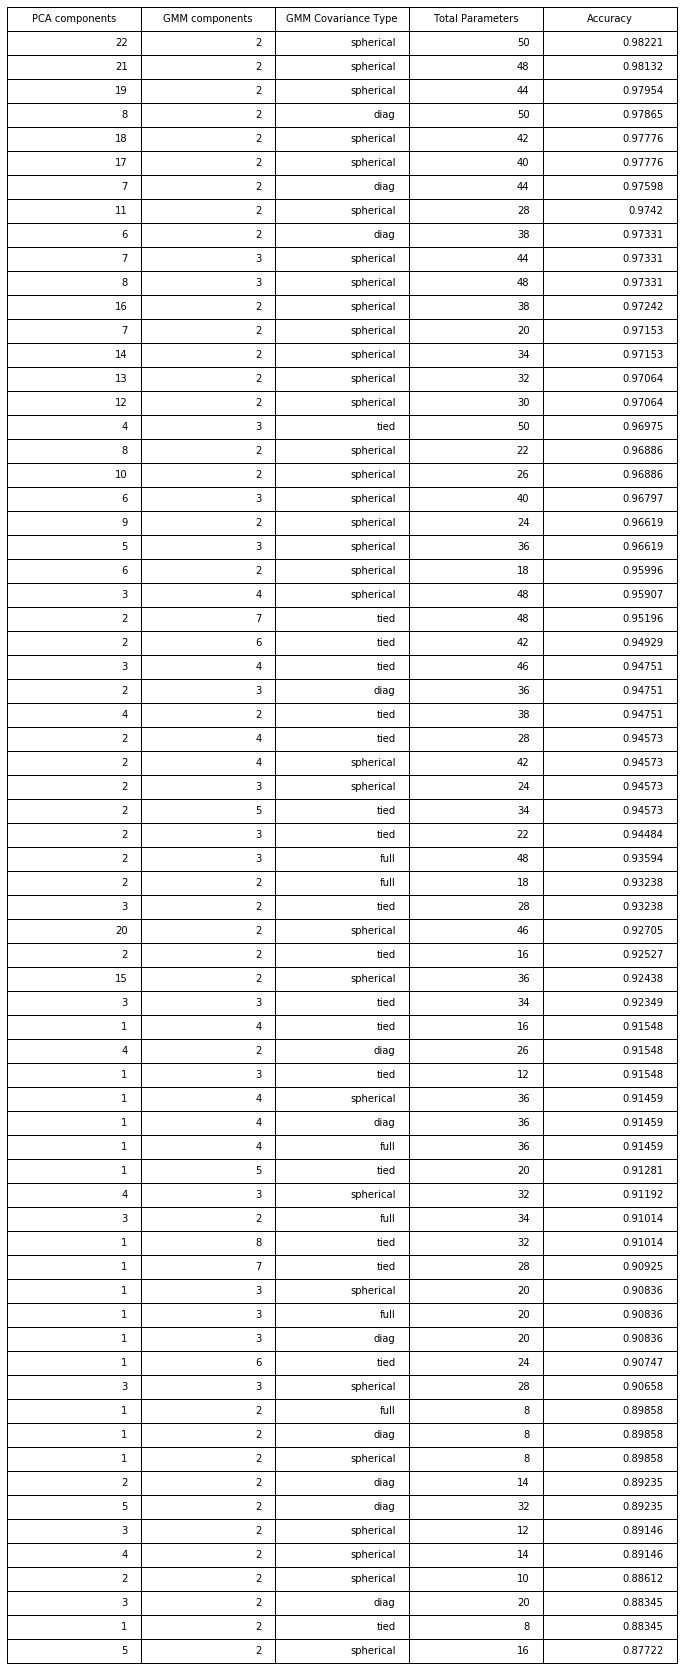

In [10]:
def P6():

    ### STUDENT START ###
    matrix =[]
    
    # Varying the number of PCA components
    for pca_comp in np.arange(1,23,1):
        
        # Use PCA to project the data feature sets on principle components
        pca = PCA(n_components=pca_comp)
    
        # Fit on training data
        train_pca = pca.fit_transform(train_data)
    
        # Transform the test data
        test_pca = pca.transform(test_data)
        
        # Varying the number of GMM components
        for gmm_comp in np.arange(2,9,1):
            
            # Varying the covariance type
            for cov_type in ['spherical', 'diag', 'tied', 'full']:                    
                
                # Produce a Gaussian mixture model
                gmm = GaussianMixture(n_components=gmm_comp, covariance_type=cov_type, random_state=12345).fit(train_pca)
                
                # Calculate the number of parameters for spherical, diag, and full covariance types
                if cov_type in ['spherical', 'diag', 'full']:                    
                    
                    # Number of MEANS per GMM component: equal to the number of principle components
                    num_means = int(gmm.means_.shape[1])
                    
                    # Number of UNIQUE/NONZERO COVARIANCE MATRIX VALUES
                    unique_nonzero_cov = np.count_nonzero(np.unique(gmm.covariances_))
                    
                    # Number of WEIGHTS per GMM component: each mixture component has 1 weight
                    mixing_weight = int(gmm.weights_.shape[0]/gmm_comp)

                    # Number of parameters = (number of parameters per gmm component) * (number of gmm components - 1) * number of classes
                    num_params = (num_means + unique_nonzero_cov + mixing_weight) * (gmm_comp - 1) * 2
                
                # Calculate the number of parameters for tied covariance type
                elif cov_type == 'tied':
                    
                    # Number of MEANS: equal to number of means for all the GMM components 
                    no_means = int(gmm_comp*pca_comp) 
                    
                    # Number of UNIQUE/NONZERO COVARIANCE MATRIX VALUES
                    unique_nonzero_cov = np.count_nonzero(np.unique(gmm.covariances_))
                    
                    # Number of WEIGHTS: equal to the number of mixture components
                    no_weights = int(gmm.weights_.shape[0]) 

                    # Number of parameters = (number of parameters per class - 1) * number of classes
                    num_params = (no_means + unique_nonzero_cov + no_weights - 1) * 2
                    
                # Problem restriction: no more than 50 parameters
                if num_params <= 50:
                    
                    # Fit positive and negative prediction models to training data
                    gmm_pos = GaussianMixture(n_components=gmm_comp, covariance_type=cov_type, random_state=12345).fit(train_pca[np.where(train_labels==1)])
                    gmm_neg = GaussianMixture(n_components=gmm_comp, covariance_type=cov_type, random_state=12345).fit(train_pca[np.where(train_labels==0)])
                    
                    # Predict the accuracy on test labels by picking the labels corresponding to the larger of the two models' probabilities.
                    GMM_labels = []
                    for pos,neg in zip(gmm_pos.score_samples(test_pca), gmm_neg.score_samples(test_pca)):
                        if pos > neg: # Positive prediction
                            GMM_labels.append(1)
                        else: # Negative prediction
                            GMM_labels.append(0)
                    accuracy = round(np.where(GMM_labels==test_labels)[0].shape[0]/test_labels.shape[0],5)
                    
                    # Add results to 2d list
                    matrix.append([pca_comp, gmm_comp, cov_type, num_params, accuracy])
    
    # Convert to numpy array
    matrix = np.array(matrix)
    
    # Sort by accuracy, descending, show only top 30 values
    matrix = matrix[matrix[:,-1].argsort()][::-1]
    
    # Show table of the results
    plt.figure(figsize=(6,6))
    plt.axis('off')
    colormatrix = np.full(matrix.shape, 'w', dtype=object) 
    table = plt.table(cellText=matrix, 
                      colLabels=['PCA components', 'GMM components', 'GMM Covariance Type', 'Total Parameters', 'Accuracy'], 
                      cellColours=colormatrix,
                      loc='center')
    table.scale(2,2)
    
    # Display
    plt.show()
                
    ### STUDENT END ###

P6()